# Part III: Prediction

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_non = pd.read_csv('nonallure_240_with_score.csv')
df_allure = pd.read_csv('allure_with_score.csv')

In [4]:
def dataprocess(df):
    import pandas as pd
    df.set_index('product_id',inplace=True)
    df = df.drop(['Unnamed: 0','brand_name','product_name','category','subcategory','all_reviews'],axis=1)
    for i, row in df.iterrows():
        price = df['price'][i]
        if '(' in price:
            price = price.split('(')[0]
        df['price'][i]= price[1:]
    df['price']=df['price'].astype(float)
    df['onestar_pct']=df['onestar_count']/df['total_review']
    df['twostar_pct']=df['twostar_count']/df['total_review']
    df['threestar_pct']=df['threestar_count']/df['total_review']
    df['fourstar_pct']=df['fourstar_count']/df['total_review']
    df['fivestar_pct']=df['fivestar_count']/df['total_review']
    df=df.drop(['onestar_count','twostar_count','threestar_count','fourstar_count','fivestar_count'],axis=1)
    return df

In [5]:
df_non=dataprocess(df_non)

In [6]:
df_allure=dataprocess(df_allure)

In [7]:
df_non['allure']=0
df_allure['allure']=1
df_all=df_allure.append(df_non)
df_all=shuffle(df_all)
df_all

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
product_id,,,,,,,,,,,,
P449138,1696,32.0,175,4.5829,165,0.756798,0.005714,0.017143,0.045714,0.251429,0.680000,0
P445447,9348,8.0,61,4.0164,50,0.628241,0.081967,0.049180,0.098361,0.311475,0.459016,0
P425933,17317,12.0,155,4.2194,127,0.656011,0.051613,0.064516,0.070968,0.238710,0.574194,0
P427527,40304,42.0,573,4.5620,527,0.852968,0.008726,0.022688,0.062827,0.209424,0.696335,1
P442845,7524,45.0,117,4.6838,111,0.751759,0.008547,0.017094,0.025641,0.179487,0.769231,1
...,...,...,...,...,...,...,...,...,...,...,...,...
P421771,1850,34.0,10,3.3000,5,0.724710,0.200000,0.200000,0.100000,0.100000,0.400000,1
P410480,21447,29.0,528,4.3239,376,0.628042,0.075758,0.047348,0.058712,0.113636,0.704545,0
P427367,7716,28.0,139,4.5899,127,0.740776,0.014388,0.043165,0.057554,0.107914,0.776978,0


<h3>Step2: check correlation</h3>

Note that they are relatviely low. The exceptions lie in total_review vs. loves and avg_rating vs. fivestar_pct/onestar_pct. However, we still keep these features due to limit of features.

In [8]:
df_all.corr()

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
loves,1.000000,-0.104620,0.853089,0.140262,0.723469,0.089282,-0.111122,-0.078939,-0.068229,0.029807,0.117135,0.217780
price,-0.104620,1.000000,-0.117813,0.073445,-0.098821,0.045630,0.000261,-0.041512,-0.101639,-0.120636,0.136798,0.122255
total_review,0.853089,-0.117813,1.000000,0.112520,0.838367,0.077076,-0.101819,-0.073907,-0.048879,0.092035,0.063496,0.188443
avg_rating,0.140262,0.073445,0.112520,1.000000,0.100072,0.670639,-0.783406,-0.628867,-0.297494,0.061328,0.869321,0.129574
recommended_count,0.723469,-0.098821,0.838367,0.100072,1.000000,0.104216,-0.092415,-0.065003,-0.037829,0.079177,0.056342,0.222707
vader_100_score,0.089282,0.045630,0.077076,0.670639,0.104216,1.000000,-0.618045,-0.386615,-0.154365,0.258808,0.471390,0.099465
onestar_pct,-0.111122,0.000261,-0.101819,-0.783406,-0.092415,-0.618045,1.000000,0.144320,-0.094425,-0.253239,-0.474637,-0.101616
twostar_pct,-0.078939,-0.041512,-0.073907,-0.628867,-0.065003,-0.386615,0.144320,1.000000,0.172435,-0.111575,-0.584774,-0.099074
threestar_pct,-0.068229,-0.101639,-0.048879,-0.297494,-0.037829,-0.154365,-0.094425,0.172435,1.000000,-0.015331,-0.458434,-0.009617
fourstar_pct,0.029807,-0.120636,0.092035,0.061328,0.079177,0.258808,-0.253239,-0.111575,-0.015331,1.000000,-0.384118,0.009008


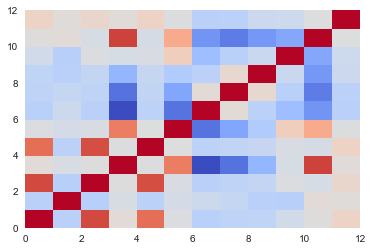

In [9]:
import matplotlib.pyplot as plot
plot.pcolor(df_all.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

<h3>Step3: Normalization</h3>

Note that the range of features differ a lot. We then use MinMaxScaler to normalize all features to increase accuracy.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_all[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']] = scaler.fit_transform(df_all[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']])

In [11]:
df_all.describe()

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.054582,0.115530,0.040372,0.784367,0.024800,0.806432,0.081061,0.068682,0.140951,0.163103,0.602584,0.500000
std,0.106539,0.124682,0.092274,0.115838,0.065215,0.084620,0.091599,0.075152,0.112474,0.091595,0.153544,0.500522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007136,0.054795,0.002632,0.728150,0.001478,0.767018,0.025069,0.030506,0.083290,0.111111,0.508581,0.000000
50%,0.018804,0.079452,0.009171,0.803875,0.005696,0.812434,0.056660,0.054351,0.125878,0.157003,0.614379,0.500000
75%,0.054457,0.120548,0.039620,0.860606,0.021326,0.859690,0.105794,0.090909,0.175068,0.202635,0.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3> Step4: train_test_split </h3>

Use train_test_split to divide the training and testing data. Divide 70% as training data and 30% as testing data.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_all, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['allure']]
x_test = test.iloc[0:,0:11]
y_test = test[['allure']]

<h3> Step5: machine learning </h3>

Try five different models to fit the data and tune hyperparameters. 
- Logistic Regression
- Decision Tree
- Random Forest
- Bagging
- Neural Network

Then we use two evaluation metrics: <strong>accuracy</strong> and <strong>AUC</strong> to compare all the models and choose the best one.

<h4>1) Logistic Regression</h4>

In [13]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
logistic_predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
logistic_acc

0.6180555555555556

In [14]:
from sklearn.metrics import roc_curve,auc
(fpr,tpr,thresholds)=roc_curve(y_test,logistic_predictions)
logistic_area=auc(fpr,tpr)
print('AUC:', logistic_area)

AUC: 0.6225043613103316


<h4>2) Decision Tree </h4>

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

dtc = DecisionTreeClassifier()

#hyperparemeter tuning
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=5)

grid_search.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6457857769973661
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}


In [16]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=4, splitter='best')
dt.fit(x_train,np.ravel(y_train))
dt_acc=dt.score(x_test,y_test)
print ('Accuracy:',dt_acc)

Accuracy: 0.6388888888888888


In [17]:
from sklearn.metrics import roc_curve,auc
dt_predictions=dt.predict(x_test)

(fpr,tpr,thresholds)=roc_curve(y_test,dt_predictions)
dt_area=auc(fpr,tpr)
print('AUC:', dt_area)

AUC: 0.6390773405698779


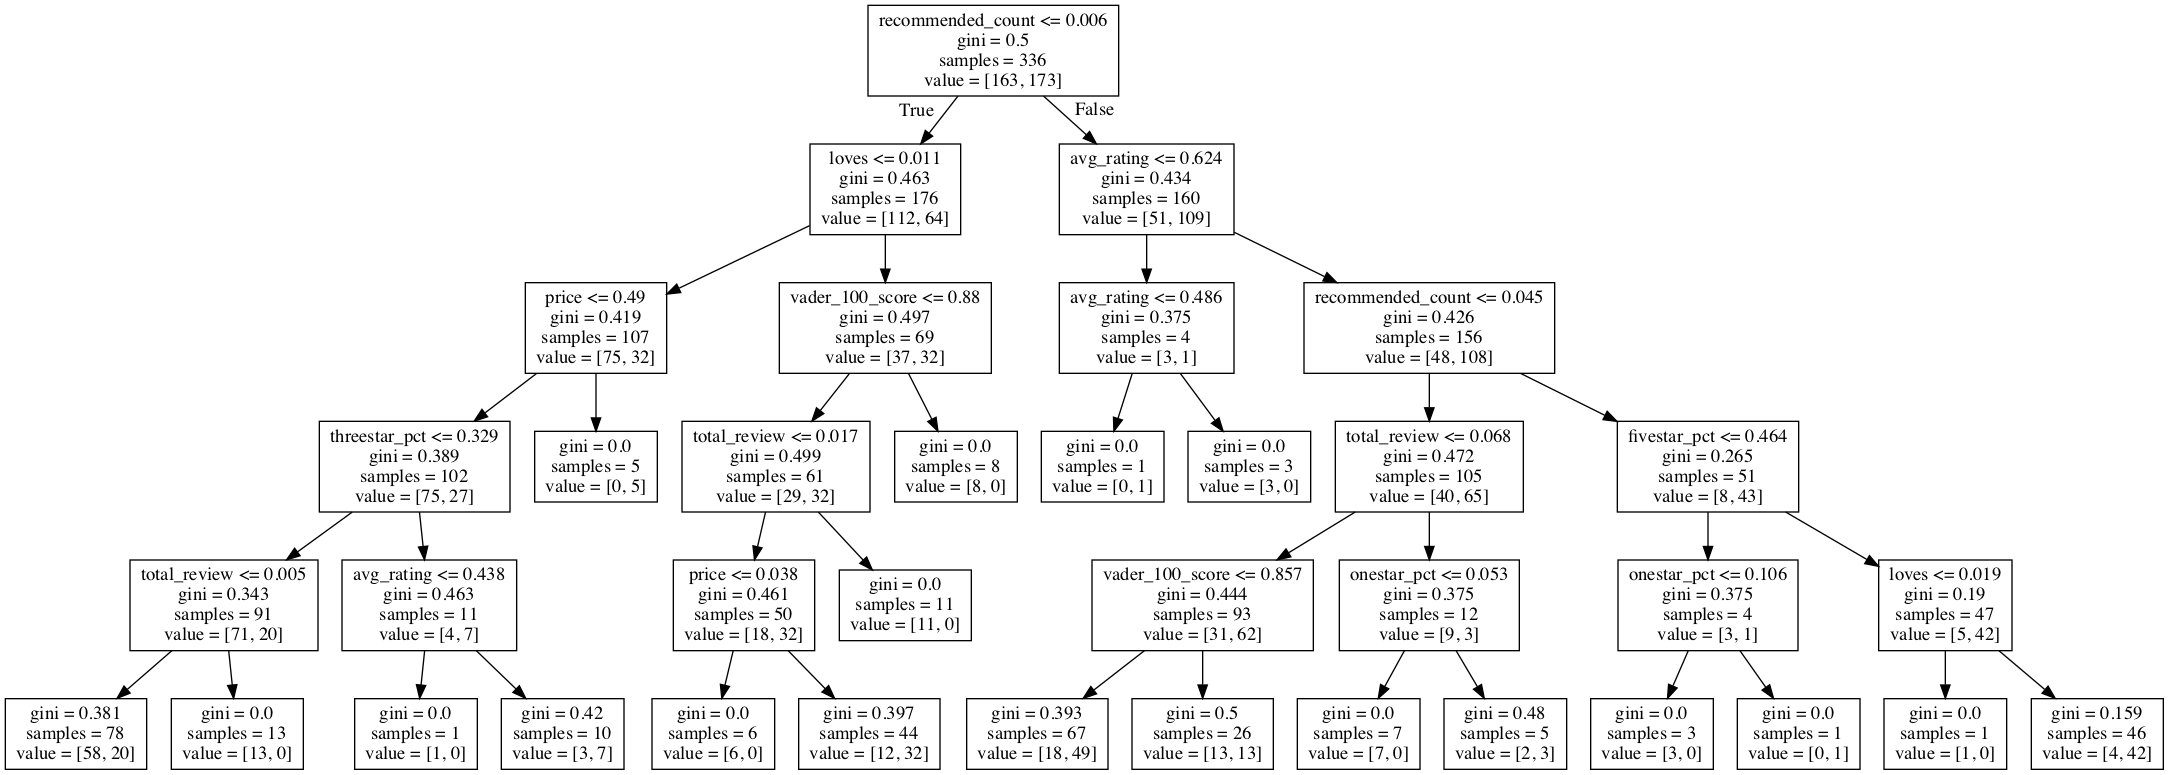

In [18]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df_all if not key == 'allure']
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=feature_names) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h4>3) Random Forest</h4>

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
     'n_estimators':(15, 20, 25, 30), #the number of trees
     'max_depth':(2,4,6,8,10),
     'min_samples_split': (2,4,8),
     'min_samples_leaf': (4,6,8,12)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=5,iid=False)
model.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.6697980684811238
Best parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 25}


In [20]:
rf= RandomForestClassifier(max_depth=2,min_samples_leaf=6,min_samples_split=4,n_estimators=15)
rf.fit(x_train,np.ravel(y_train))
rf_acc=rf.score(x_test,y_test)
print('Accuracy:', rf_acc)

Accuracy: 0.6319444444444444


In [21]:
from sklearn.metrics import roc_curve,auc
rf_predictions=rf.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,rf_predictions)
rf_area=auc(fpr,tpr)
print('AUC:',rf_area)

AUC: 0.6393680945919753


<h3>Feature Importance</h3>

We can derive feature importance from the random forest model. The top 5 important features are the star rating percentages. Then follows our sentiment analysis (vader compound score) on all reviews.

([<matplotlib.axis.YTick at 0x1a2eda20f0>,
 <a list of 11 Text yticklabel objects>)

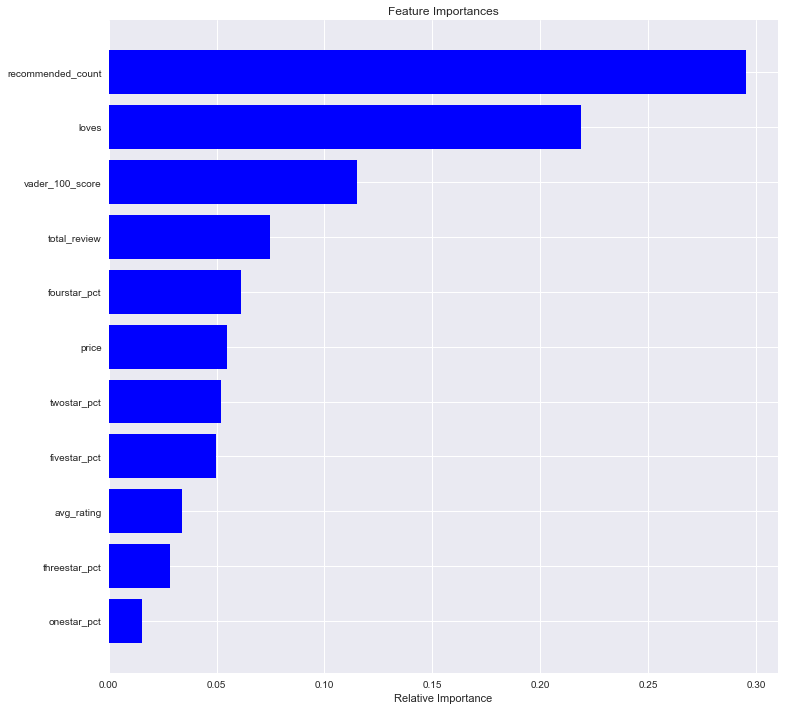

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])

<h4>4) Bagging</h4>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,20,30,40), #the number of trees
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(2,4,6,8),
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=5,iid=False)
model.fit(x_train, np.ravel(y_train))
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.6370061457418787
Best parameters: {'max_features': 6, 'max_samples': 0.3, 'n_estimators': 40}


In [24]:
bg= BaggingClassifier(max_features=6,max_samples=0.5,n_estimators=10)
bg.fit(x_train,np.ravel(y_train))
bg_acc=bg.score(x_test,y_test)
print('Accuracy:',bg_acc)

Accuracy: 0.6111111111111112


In [25]:
from sklearn.metrics import roc_curve,auc
bg_predictions=bg.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,bg_predictions)
bg_area=auc(fpr,tpr)
print('AUC:',bg_area)

AUC: 0.6092265943012212


<h4>4) Neural network</h4>

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((5,),(10,),(15,),(20,)),
    'max_iter': (600,800,1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.6845039508340649
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (5,), 'learning_rate': 'invscaling', 'max_iter': 1000, 'solver': 'lbfgs'}


In [27]:
nn= MLPClassifier(activation='tanh',hidden_layer_sizes=20,learning_rate='constant',max_iter=600,solver='adam')
nn.fit(x_train,np.ravel(y_train))
nn_acc=nn.score(x_test,y_test)
print ('Accuracy:',nn_acc)

Accuracy: 0.6666666666666666


In [28]:
from sklearn.metrics import roc_curve,auc
nn_predictions=nn.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,nn_predictions)
nn_area=auc(fpr,tpr)
print('AUC:',nn_area)

AUC: 0.6669897266912193


<h3> Compare all models performance </h3>

Based on the results, we conclude that Random Forest is the best model to use.

In [29]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Accuracy', 'AUC'])
t.add_row(['Logistic Regression', "%.2f" % logistic_acc, "%.2f" % logistic_area])
t.add_row(['Decision Tree', "%.2f" % dt_acc, "%.2f" % dt_area])
t.add_row(['Random Forest', "%.2f" % rf_acc, "%.2f" % rf_area])
t.add_row(['Bagging', "%.2f" % bg_acc, "%.2f" % bg_area])
t.add_row(['Neural Network', "%.2f" % nn_acc, "%.2f" % nn_area])
print(t)

+---------------------+----------+------+
|        Model        | Accuracy | AUC  |
+---------------------+----------+------+
| Logistic Regression |   0.62   | 0.62 |
|    Decision Tree    |   0.64   | 0.64 |
|    Random Forest    |   0.63   | 0.64 |
|       Bagging       |   0.61   | 0.61 |
|    Neural Network   |   0.67   | 0.67 |
+---------------------+----------+------+


<h3>Examine our results</h3>

<h4>1) ROC Curve</h4>

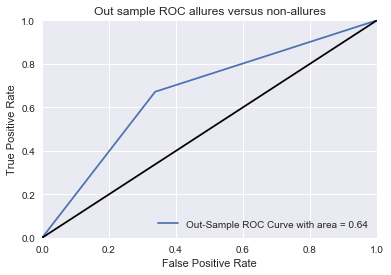

In [30]:
from sklearn.metrics import roc_curve,auc

plt.clf()
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%rf_area)
plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC allures versus non-allures')
plt.legend(loc="lower right")
plt.show()

<h4>2) Confusion Matrix</h4>

In [31]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(np.ravel(y_test),rf_predictions)
cfm

array([[41, 36],
       [17, 50]])

In [32]:
def c_m_analysis(true,pred,threshold=0.5):
    tn, fp, fn, tp = cfm.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as allure are allure"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual allure identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of non-allure identified as allure"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

In [33]:
c_m_analysis(y_test,rf_predictions,0.5)

Precision:			0.58 identified as allure are allure
Recall/TPR:			0.75 proportion of actual allure identified
False Positive Rate:		0.47 proportion of non-allure identified as allure
f-score:			0.65 tradeoff between precision and recall
Accuracy:			0.63 how well the model has classified
